# Supervised Learning(지도학습)
* Regression
- Classfication

## Classfication
- 문제를 분류해서 해결하는 것, 어떤 기준에 의해서 A집단, B집단으로 나눔

### 아이리스 꽃 데이터셋을 활용한 Logistic Regression

#### * Logistic Regression
- 선 하나를 통해 값을 예측하면 = regression.
- 선을 통해 집단을 분류하게 되면 = Logistic Regression, 선형회귀 변형,
- sklearn 패키지의 linear_model 안에 포함된 모듈
---
※ 하이퍼 파라미터 : 파라미터를 조정하는 작업

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### - 데이터셋의 데이터를 가져오는 방법

In [5]:
data = iris.data                          # data = 전체 피쳐
label = iris.target                       # target = 라벨 정보 (세토사, 버지니카, 버지칼라)
columns = iris.feature_names      # feature_names = 칼럼 정보

In [6]:
data = pd.DataFrame(data, columns=columns)      # 판다스 데이터프레임 객체
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data.shape

(150, 4)

#### - 데이터 쪼개기
- 피쳐 = X, 라벨 = y 학습용 피쳐, 테스트용 피쳐, 학습용 라벨, 테스트용 라벨로 나눈다.
- 보통 비율 8:2


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=3035)
# data = X_train, X_test로 나눠 들어감, label = y_train, y_test로 나눠 들어감
# test_size=0.2 = 20퍼를 테스트데이터로 쓴다. random_state=? 임의값으로 섞는다, 데이터가 편향되면 임의값 바꿔줘야함                                                                                                             

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

모델을 학습시키기 위해서 모델에 데이터를 입혀주는 과정

In [11]:
lr.fit(X_train, y_train) # 데이터를 알고리즘에 입력한 순간 알고리즘은 모델이 된다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

데이터가 잘 입력되었는지 확인하기 위해 테스트(예측)

In [12]:
y_pred = lr.predict(X_test) 
# 실제 y값과 예측y값을 비교하기 위해 예측치에 대한 y값 변수 정의
y_pred

array([1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 2])

In [13]:
# 실제 y값(진짜 라벨 데이터)
y_test  

array([1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 2])

In [15]:
from sklearn.metrics import accuracy_score

print('로지스틱 회귀 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)*100))
print('로지스틱 회귀, \n 계수(w) : {0}\n 절편(b) : {1}'.format(lr.coef_, lr.intercept_))
# 계수와 절편, 값을 알기위한 y = wx + b, y = 예측치, w = 기울기(계수), b = y축의 절편(그래프선의 시작값)
# 특성의 수만큼 선이 여러개가 쓰인다. 선 하나 기준 = 회귀, 여러개는 다중회귀
# 아이리스 꽃 데이터는 클래스 3개, 속성이 4개니 선이 4개 = 계수(기울기)값이 클래스별로 4개
# 계수(기울기)의 의미 = 증가값이 가파르냐 평이하냐, x값이 증가할 때 y값이 얼마만큼 올라가느냐

로지스틱 회귀 정확도 : 90.00
로지스틱 회귀, 
 계수(w) : [[-0.37346741  0.90200401 -2.35098313 -0.99479577]
 [ 0.46462406 -0.37362241 -0.06353946 -0.99937817]
 [-0.09115665 -0.5283816   2.41452259  1.99417395]]
 절편(b) : [  9.00842952   2.13182348 -11.14025301]


#### Support Vector Machine(SVM)
* 쌓인 데이터 사이를 어떻게 잘 분류할까?
- 데이터 집합을 구성, 집합 간 공간(=거리)=마진
- 마진을 가장 많이 확보하는 방법을 찾아내는 모델
- 기본 알고리즘만 사용했던 로지스틱회귀와는 다르게 파라미터값을 정할 수 있음.
- 나눠져 있는 집합들 간 사이에 노이즈가 껴있을 수 있음.
- C값을 높여줄수록 노이즈들을 무시할수 있는 정도가 높아짐(기본값=1)
- 데이터를 나누는 선이 선이라고 생각하면 안됨.(2차원으로 생각하면 안된다는 말인것같음)
  - 데이터 집합이 군데군데 모여있으면 어떻게 나눠야 정확도가 높아지는지 2차원에서는 해결이 안될 때가 있음
  - 이럴 때는 한차원을 높여서 선이 아닌 면, 평면으로 나누고 후에도 데이터가 계속 존재하기 때문에 큰 평면으로 쪼갠다 하여 이 나누는 큰 평면을 초평면이라고 함.
- Support Vector Machine에서 가장 큰 역할 중 하나는 초평면을 찾는 것이다.

In [34]:
# SVM(SVC(SVM을 이용한 Classfication을 한다))
from sklearn.svm import SVC

In [37]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: 
  svc = SVC(C=i)                           
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print('서포트 벡터 머신, i={}\n 정확도 : {:.2f}\n'.format(i, accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, i=0.1
 정확도 : 93.33

서포트 벡터 머신, i=0.2
 정확도 : 90.00

서포트 벡터 머신, i=0.3
 정확도 : 90.00

서포트 벡터 머신, i=0.4
 정확도 : 90.00

서포트 벡터 머신, i=0.5
 정확도 : 90.00

서포트 벡터 머신, i=0.6
 정확도 : 90.00

서포트 벡터 머신, i=0.7
 정확도 : 90.00

서포트 벡터 머신, i=0.8
 정확도 : 96.67

서포트 벡터 머신, i=0.9
 정확도 : 96.67

서포트 벡터 머신, i=1
 정확도 : 93.33



AI Engineer -> MLOps Engineer
## MLOps
- 파이썬에서는 코드 자체는 별게없음 이해해야지
- "생각보다 쉽잖아" 딜레마에 빠지면안됨
- Machine Learning Process
  - Data sources를 Classic ML할건지, Deep Learning할건지 선택
  - Hyperparameter를 통한 Tuning을 하면 모델이 나오는데
  - 그 모델을 자기 컴퓨터나 정해져있는 서버에서 고정되있는 데이터로 실습
  - 플라스크로 웹서버 만들어서 결과도출하는 API를 만들기도 하고
  - 서버에 배포할 때 문제가 생기는건 컴퓨터환경과 서버환경이 서로 안맞아서임
  - 그 문제를 해결하기 위해 나온게 도커(Docker)
  - 서버에 모델뿐만 아니라 환경을 컨테이너로 만들어서 배포
  - 도커 환경을 클라우드에서 많이 실행함
  - 컨테이너를 관리하기 위한 서비스가 구글 쿠버네티스(Kubernetes)
  - 도커 여러 개를 대량으로 묶어 관리하는 서비스가 쿠버네티스(작은 클라우드라고 불리기도 함)
  - 모델을 만들어서 배포했는데 운영팀에서 이상한결과 탐지
  뭔가 문제가 생겼을 때 뒤돌아가야되는데, 실제 환경에서는 데이터가 수시로 바뀜
  모델을 학습시키는데 시간, 모델을 이용해 운영하는데 자원을 얼마나 먹는지, 전부 체크해야됨.
  성능이 좋아도 이러한 요소들 때문에 운영에 마이너스가 되는 경우도 있음.
  - 전체 운영 시스템에서 보면 전체 시스템을 configuration하는 것임,
  - Data 수집 -> 추출 -> 검증 -> 모델링 -> 리소스 매니지먼트 -> 검증 -> 프로세스 매니지먼트 -> 서버에 배포(Serving Infrastructure) -> 모니터링. 이 전체 시스템을 관리하는 사람을 MLOps Engineer라고 함. 
- 리서치 ML = 학교나 연구소, 고정 데이터, 좋은 성능의 모델, 새로운 구조의 모델, 
고정 데이터라 파라미터 기반으로 재학습, 논문출판목적, 오프라인에서 학회같은 곳에서 표현

- 프로덕션 ML = 계속 변하는 데이터, 빠른 인퍼런스 속도, 적은 리소스, 안정적인 운영, 전체 시스템 구조, 서비스에서 문제 해결이 가장 큰 목적


### Decision Tree(의사결정 나무)
- 트리 알고리즘에서는 각각의 기준에 따라 예, 아니오로 쪼갬
- 각각의 단위를 노드, 최상위 노드를 루트 노드라고 함
- 분기가 나오면 리프 노드(나무를 거꾸로 놓은 거라고 생각하면됨)
- if문 덩어리라고 생각하면 됨.
- 가장 큰 변별력이 있는 지표들을 위로 올리고 변별력 순으로 아래로 내려가면서 if문을 돌림.


In [73]:
# Decesion tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)          
# max_depth값 바꾸고 나서 돌릴 떄 시각화파일 생성시 파일명 바꿔서 저장

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Decision Tree Accuracy score : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Decision Tree Accuracy score : 90.00%


---
## Max-depth값 안줬을 떄

In [39]:
from sklearn.tree import export_graphviz # tree의 구조를 .dot파일로 시각화 해주는 모듈

export_graphviz(dt, out_file='tree.dot')    # dt = Decesion tree 학습시킨 모델

In [69]:
from subprocess import call 

call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

# subprocess = dot파일의 내용을 하위계층의 내용들을 그림으로 그려주는 역할

0

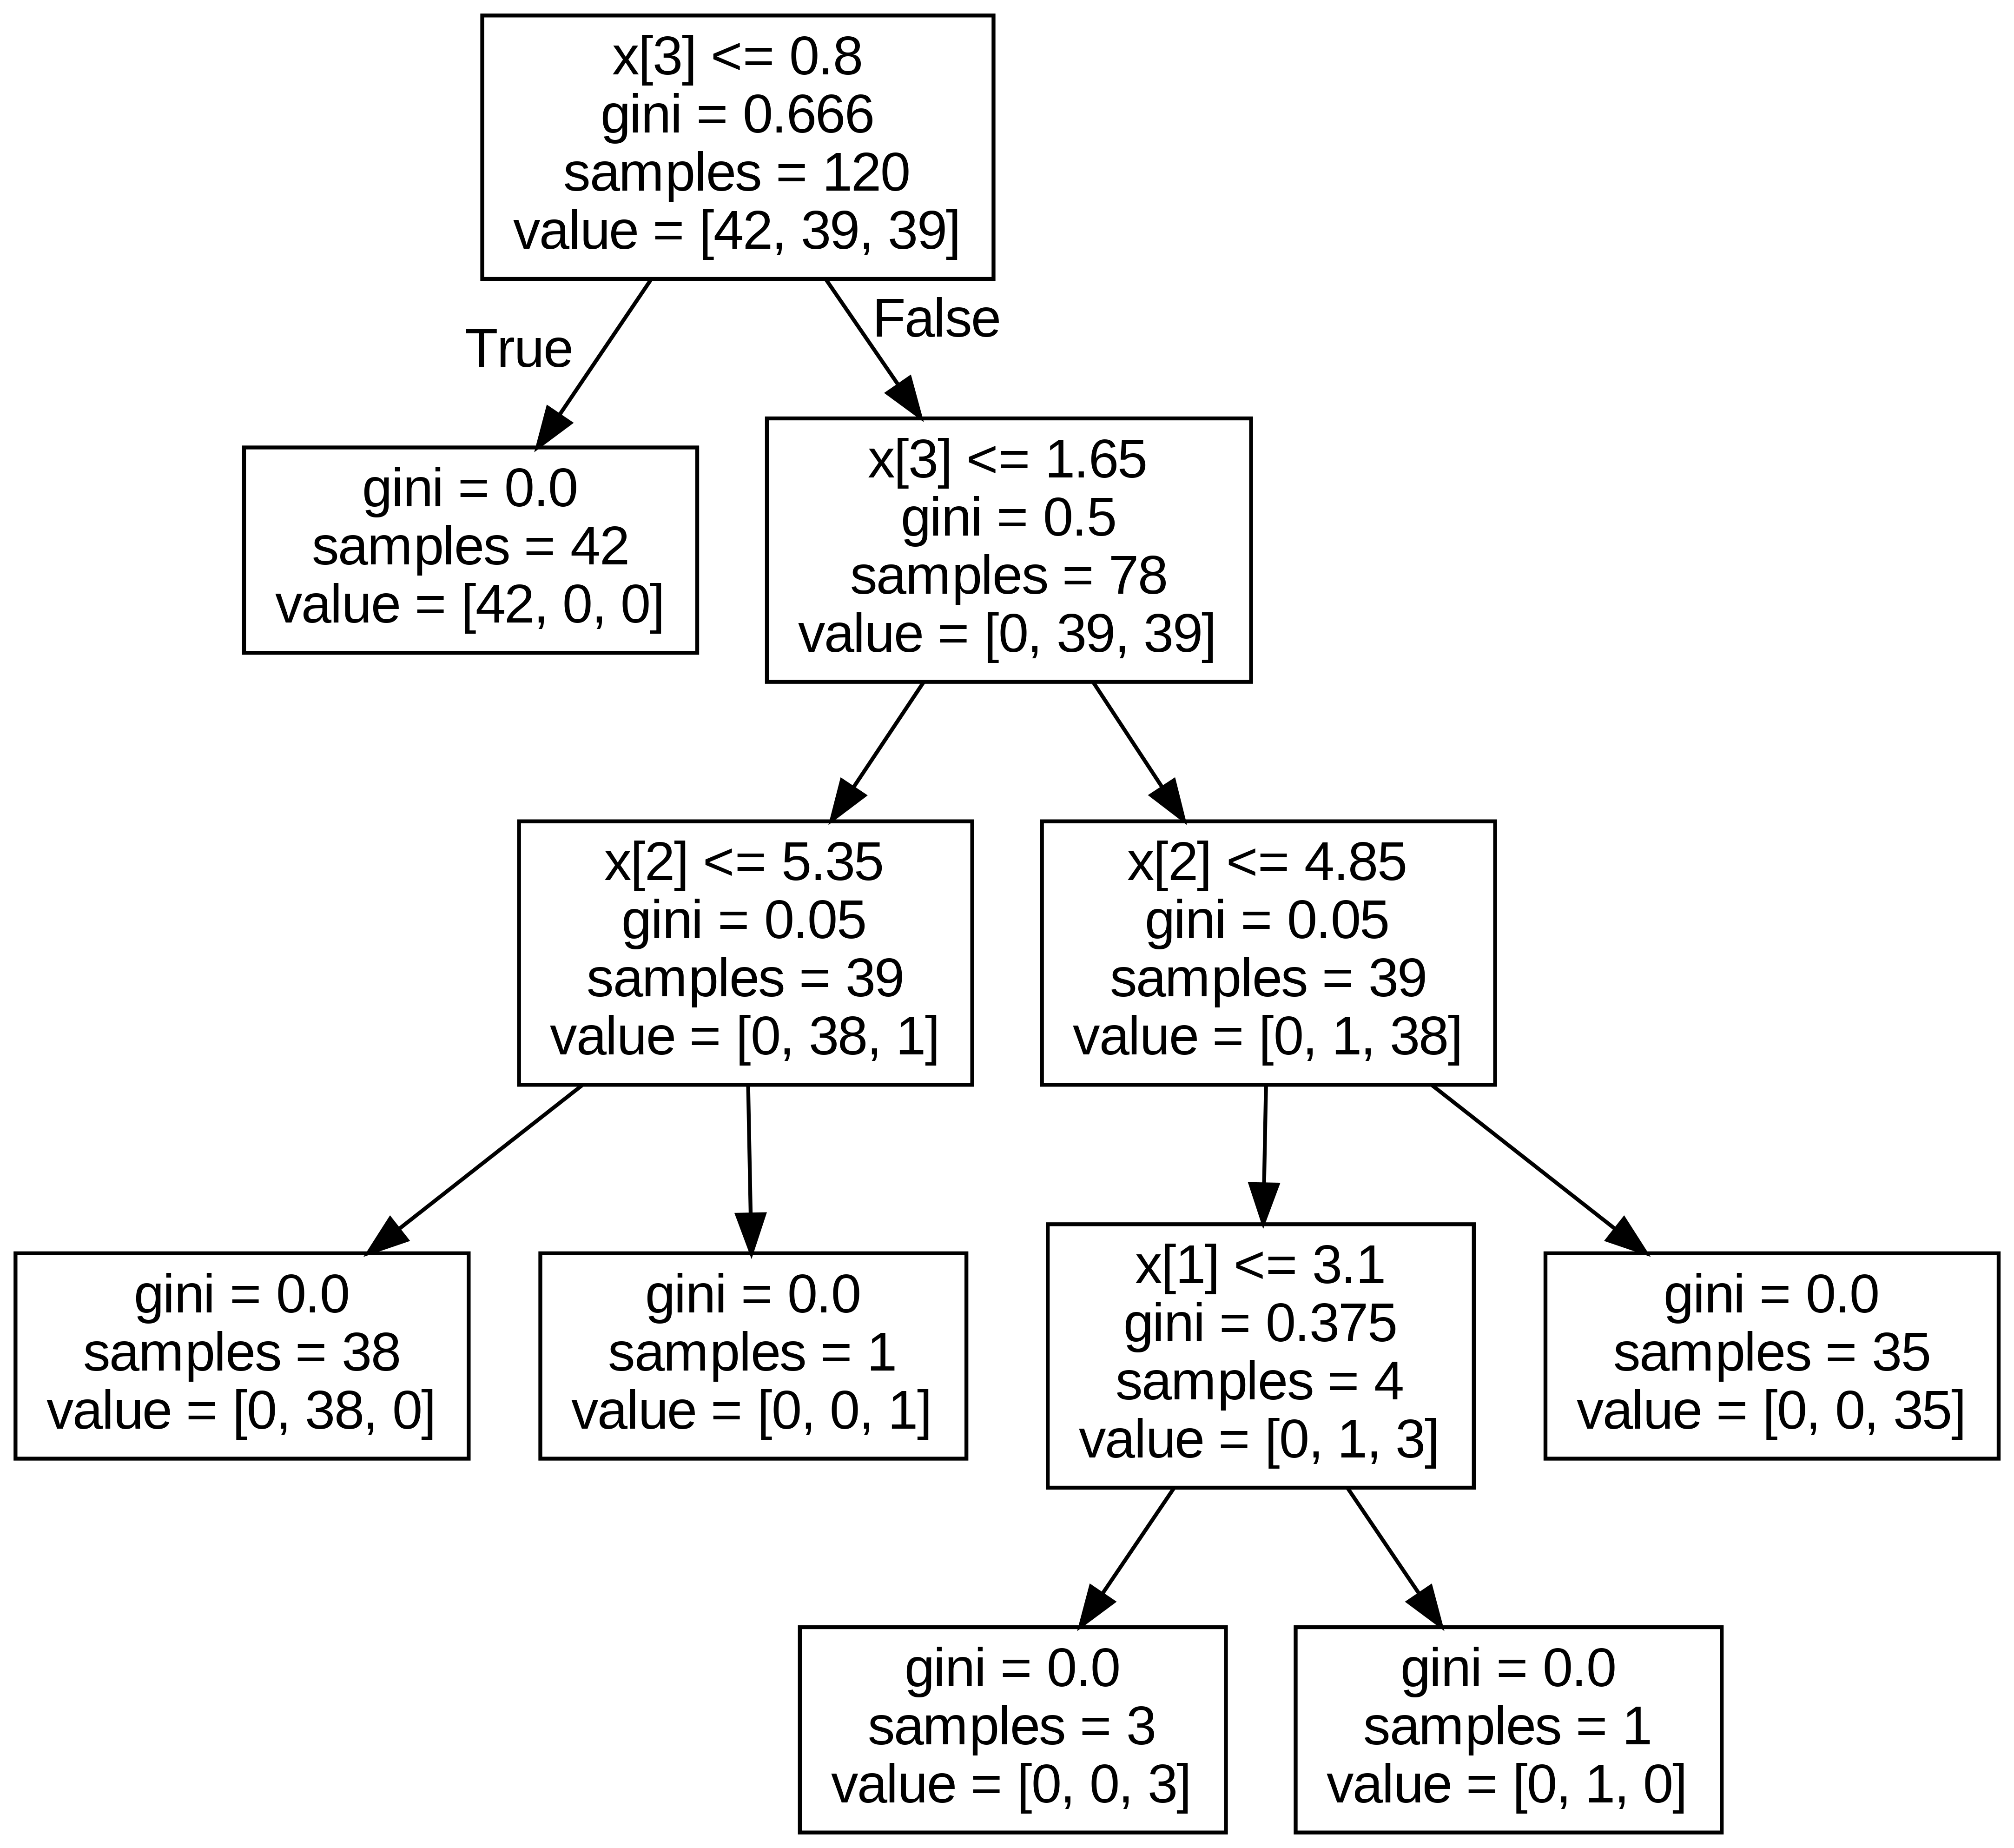

In [71]:
from IPython.display import Image
Image(filename = 'decision-tree.png')

#### Tree 해석
- 루트 노드에서 4번째 피쳐가 0.8보다 작냐 크냐? 샘플 120개 중 38개가 true로 39개, 43개는 False로 이동.
- gini는 전체 데이터에서 yes와 no의 비율을 나타낸다.
---
##  Max-depth=3

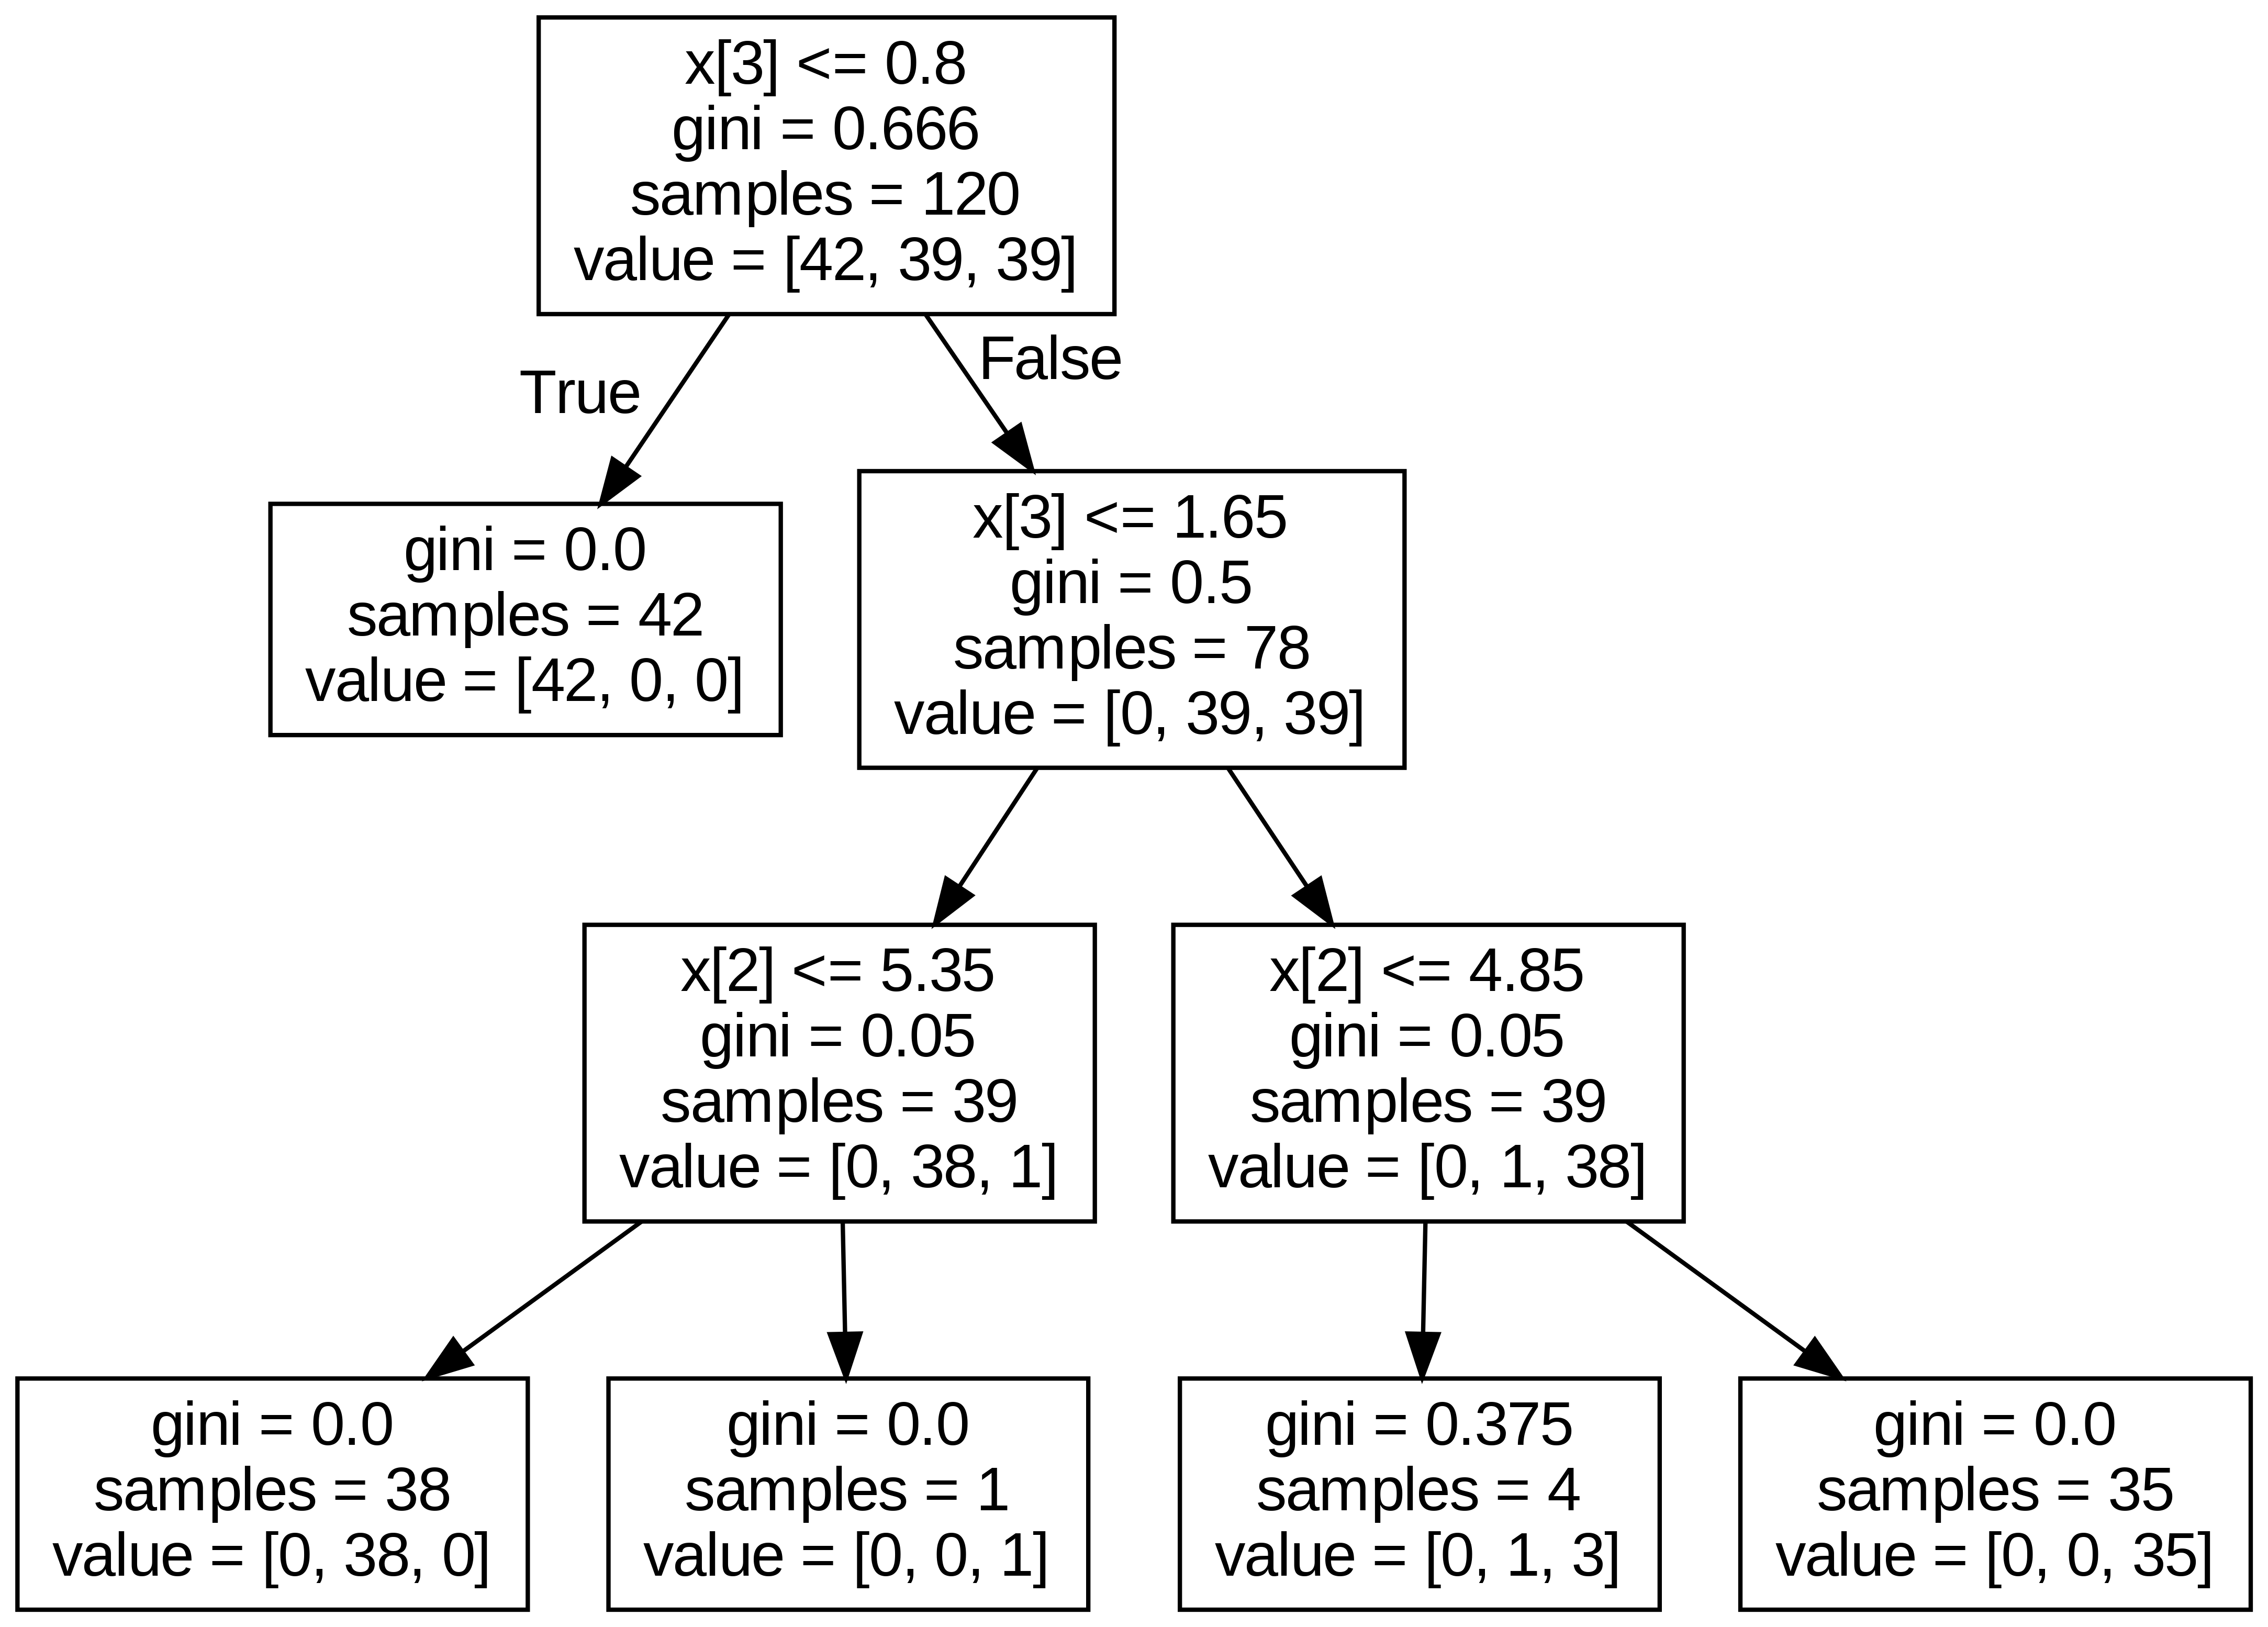

In [74]:
export_graphviz(dt, out_file='tree1.dot')
call(['dot', '-Tpng', 'tree1.dot', '-o', 'decision-tree1.png', '-Gdpi=600'])
Image(filename = 'decision-tree1.png')

## Random Forest


In [79]:
# 같은걸 여러개를 써서 만들어내는 것들을 앙상블이라고 한다.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Random Forest accuracy score : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Random Forest accuracy score : 86.67%


Classfication의 평가 방법
- 정확도(accuracy score)
  - 원본데이터 = y, 예측데이터 = y_hat
  - 원본과 예측데이터를 비교해 일치하지 않는 데이터가 나온 확률을 빼면 정확도.

- Confusion Matrix
- ROC Curve, AUC
---
### Abalone datasets Random Forest Classfication 



In [80]:
import os
from os.path import join

abalone_path = join('.', 'abalone.txt')
column_path = join('.','abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
  abalone_columns.append(l.strip())

In [87]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

data = data[data['Sex'] !='I']    # 미성숙 전복 데이터는 빼고
label = data['Sex'].map(lambda x : 0 if x=='M' else 1) 
# 정규표현식 람다식 x 기본값은 0, x가 M이면 넘어가고, M이 아니면 1인 것을 라벨에 저장
# 성별 데이터가 필요 없기 때문에 성별값을 label값으로 이용하고 성별 데이터는 삭제한다.
del data['Sex']
data.head() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [88]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2153)

In [89]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [92]:
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall : {:.2f}'.format(recall_score(y_test, y_pred)))
print('Roc_Auc : {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy : 0.52
Precision : 0.55
Recall : 0.18
Roc_Auc : 0.52


* Accracy_score = 정확도(전체 데이터 중 제대로 분류된 데이터의 비율, 모델이 얼마나 정확하게 분류하는지)
- Precision_score = 정밀성(Positive로 예측한 내용 중 실제 Positive의 비율)
- Recall_score = 민감도(본 Positive 데이터 수에서 Positive로 분류된 수)
- Roc_Auc_score = ROC면적(ROC 그래프는 가로축을 FP Rate 값, 세로축을 TP Rate(Recall) 값으로 하여 시각화한 그래프이다. 이 지표는 ROC그래프의 면적값을 나타낸다.)

In [93]:
for i in [2,3,4,5,6,7,8,9,10]:
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  print('max_depth={}, Accuracy score : {:.2f}'.format(i, accuracy_score(y_test, y_pred)))

max_depth=2, Accuracy score : 0.50
max_depth=3, Accuracy score : 0.50
max_depth=4, Accuracy score : 0.51
max_depth=5, Accuracy score : 0.53
max_depth=6, Accuracy score : 0.51
max_depth=7, Accuracy score : 0.54
max_depth=8, Accuracy score : 0.53
max_depth=9, Accuracy score : 0.52
max_depth=10, Accuracy score : 0.54


In [99]:
best_model_depth = 0
best_model_acc = 0

for i in [2,3,4,5,6,7,8,9,10]:
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print('max_depth={}, Accuracy score : {:.2f}'.format(i, acc * 100))

  if best_model_acc < acc:
    best_model_depth = i
    best_model_acc = acc
    
print('-----------------------------------------------------')
print('Best model depth = {0}, Best model Accuracy : {1}'.format(best_model_depth, best_model_acc))

max_depth=2, Accuracy score : 49.03
max_depth=3, Accuracy score : 51.15
max_depth=4, Accuracy score : 50.26
max_depth=5, Accuracy score : 52.03
max_depth=6, Accuracy score : 53.09
max_depth=7, Accuracy score : 52.38
max_depth=8, Accuracy score : 52.38
max_depth=9, Accuracy score : 53.44
max_depth=10, Accuracy score : 51.68
-----------------------------------------------------
Best model depth = 9, Best model Accuracy : 0.5343915343915344


## Linear Regression(선형 회귀)
- 선형 회귀는 종속 변수와 한개 이상의 독립 변수와의 선형 상관관계를 모델링하는 회귀 분석 기법이다. 식 : y = wx+b
- 데이터와 선 사이의 격차가 적으면 오차가 적다.
### Simple Linear Regression


In [100]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [101]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [102]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [103]:
data = pd.DataFrame(data, columns=columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [104]:
data.shape # 442개 인스턴스, 10개 속성

(442, 10)

In [105]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2786)

In [112]:
# 혈당 수치만 볼거임(simple LR)
# sklearn이 원하는 numpy 배열 형태로(차원 안에 차원이 있는 형태) 바꿔줘야함
# reshape 안에서는 튜플타입으로 데이터 표현, -1은 세로로 알아서, 1은 가로로 한개씩 넣어서 독립적 배열을 만들기
s6np_train = X_train['s6'].values.reshape((-1, 1))
sim_lr.fit(s6np_train, y_train)

LinearRegression()

In [113]:
s6np_test = X_test['s6'].values.reshape((-1, 1))
y_pred = sim_lr.predict(s6np_test)

In [127]:
from sklearn.metrics import r2_score
print('단순선형회귀, R2 : {:.2f}'.format(r2_score(y_test, y_pred)))
print('단순선형회귀 계수(w) : {:.2f}, 절편(b) : {:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순선형회귀, R2 : 0.12
단순선형회귀 계수(w) : 601.67, 절편(b) : 150.34


[-0.08806194 -0.0632093  -0.03835666 -0.01350402  0.01134862  0.03620126
  0.06105391  0.08590655  0.11075919  0.13561183]
[ 97.35282148 112.30600391 127.25918634 142.21236877 157.1655512
 172.11873364 187.07191607 202.0250985  216.97828093 231.93146336]


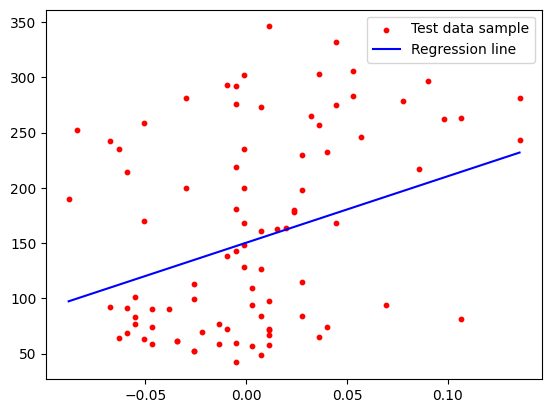

In [126]:
# Linear line 생성하기
line_X = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = sim_lr.predict(line_X.reshape((-1,1)))

print(line_X)
print(line_y)

# Test Data 표현하기
plt.scatter(X_test['s6'], y_test, s=10, c='r')
plt.plot(line_X, line_y, c='blue')
plt.legend(['Test data sample', 'Regression line'])

In [134]:
# Multiple Linear Regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

print('다중 선형회귀 R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

다중 선형회귀 R2 : 0.49


# Machine Learning Algorithm Based Regression
* 결정 트리(Decision Tree Regression) :
데이터의 불순도를 최소화해서 분기를 생성한다
- 랜덤 포레스트
- SVM
- AdaBoost
- Gradient Boosting

## 결정 트리(Decision Tree Regression) :
데이터의 불순도를 최소화해서 분기해서 모델을 생성한다

In [152]:
# Decision Tree Regressor(이 알고리즘을 하나의 객체처럼 본다.)
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5) 
# 데이터에 매몰되지 않게 해주는것도 중요함

In [153]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

print('단순 결정트리 회귀 R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

단순 결정트리 회귀 R2 : 0.13


[-0.08806194 -0.0632093  -0.03835666 -0.01350402  0.01134862  0.03620126
  0.06105391  0.08590655  0.11075919  0.13561183]
[105.51851852  79.8        115.43181818 160.10344828 119.3
 188.25714286 221.57142857 208.5        204.4        245.        ]


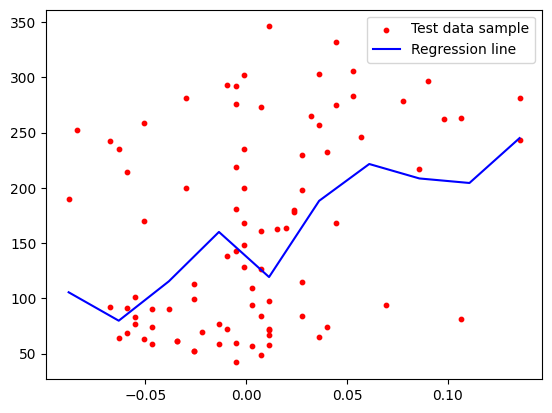

In [154]:
# Linear line 생성하기
line_X = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = dt_regr.predict(line_X.reshape((-1,1)))

print(line_X)
print(line_y)

# Test Data 표현하기
plt.scatter(X_test['s6'], y_test, s=10, c='r')
plt.plot(line_X, line_y, c='blue')
plt.legend(['Test data sample', 'Regression line'])

In [162]:
mt_regr = DecisionTreeRegressor(max_depth=2)
mt_regr.fit(X_train, y_train)
y_pred = mt_regr.predict(X_test)

print('다중 결정트리 회귀 R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

다중 결정트리 회귀 R2 : 0.37


# Support Vector Machine(classfication, regression)

In [176]:
from sklearn.svm import SVR
svm_regr = SVR()
svm_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)
y_pred = svm_regr.predict(X_test['s6'].values.reshape((-1, 1)))

print('단순 서폿벡터머신 회귀 R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

단순 서폿벡터머신 회귀 R2 : 0.03


In [175]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  m_regr = SVR(C=i)
  m_regr.fit(X_train, y_train)
  y_pred = m_regr.predict(X_test)
  print('다중 서폿벡터머신 회귀 i={}, R2 : {:.2f}'.format(i, r2_score(y_test, y_pred)))

다중 서폿벡터머신 회귀 i=1, R2 : 0.09
다중 서폿벡터머신 회귀 i=2, R2 : 0.20
다중 서폿벡터머신 회귀 i=3, R2 : 0.27
다중 서폿벡터머신 회귀 i=4, R2 : 0.32
다중 서폿벡터머신 회귀 i=5, R2 : 0.36
다중 서폿벡터머신 회귀 i=6, R2 : 0.38
다중 서폿벡터머신 회귀 i=7, R2 : 0.40
다중 서폿벡터머신 회귀 i=8, R2 : 0.41
다중 서폿벡터머신 회귀 i=9, R2 : 0.43
다중 서폿벡터머신 회귀 i=10, R2 : 0.44
다중 서폿벡터머신 회귀 i=11, R2 : 0.45
다중 서폿벡터머신 회귀 i=12, R2 : 0.46
다중 서폿벡터머신 회귀 i=13, R2 : 0.46
다중 서폿벡터머신 회귀 i=14, R2 : 0.46
다중 서폿벡터머신 회귀 i=15, R2 : 0.46
다중 서폿벡터머신 회귀 i=16, R2 : 0.46
다중 서폿벡터머신 회귀 i=17, R2 : 0.46
다중 서폿벡터머신 회귀 i=18, R2 : 0.46
다중 서폿벡터머신 회귀 i=19, R2 : 0.47
다중 서폿벡터머신 회귀 i=20, R2 : 0.47


## Multi Layer Perceptron Regressor

In [179]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=400)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중MLP회귀 R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

다중MLP회귀 R2 : -0.13


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
